## Diabetes

In [17]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

In [4]:
dia = load_diabetes()
dia

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
X=dia.data
y=dia.target

In [6]:
reg=LinearRegression()
lasso_reg=Lasso(alpha=0.3)

reg.fit(X,y)
lasso_reg.fit(X,y)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
for a, b in zip(dia.feature_names, reg.coef_):
    print("%s: %f" %(a,b))

age: -10.012198
sex: -239.819089
bmi: 519.839787
bp: 324.390428
s1: -792.184162
s2: 476.745838
s3: 101.044570
s4: 177.064176
s5: 751.279321
s6: 67.625386


## 해석 (where alpha=0.3)

우선 항목들의 의미를 알아보자.

age : 나이

sex : 성별

bmi : 체질량지수

bp :  혈압 지수

s1 : total cholesterol(TC) :  혈중 콜레스테롤 지수

s2 : low density lipoproteins : 혈중 저밀도지단백질 지수

s3 : high density lipoproteins : 혈중 고밀도지단백질 지수

s4 : TCH

s5 : serum concentration of lamorigine(LTG)

s6 : glucose : 혈중 포도당 지수

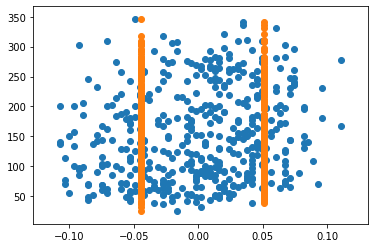

In [8]:
import matplotlib.pyplot as plt
x=[i[0] for i in X]
plt.scatter(x,y)

x=[i[1] for i in X]
plt.scatter(x,y)

저는 여기서 나이와 성별에서 유의미한 의미를 찾지 못하였습니다.

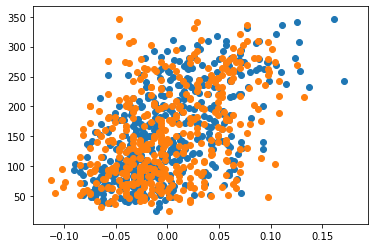

In [9]:
x=[i[2] for i in X]
plt.scatter(x,y)

x=[i[3] for i in X]
plt.scatter(x,y)

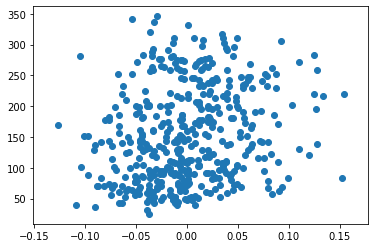

In [10]:
x=[i[4] for i in X]
plt.scatter(x,y)

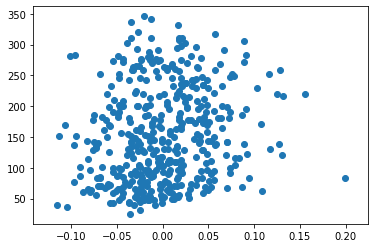

In [11]:
x=[i[5] for i in X]
plt.scatter(x,y)

### 성별과, 나이에 무관하게 alpha 값을 만들어 보겠습니다.

In [12]:
for a, b in zip(dia.feature_names, lasso_reg.coef_):
    print("%s: %f" %(a,b))

age: 0.000000
sex: -0.000000
bmi: 504.746418
bp: 189.776551
s1: -0.000000
s2: -0.000000
s3: -112.572744
s4: 0.000000
s5: 438.799912
s6: 0.000000


## ※결론
나이와 성별이 무관하게 나타나는 최소값인 alpha=0.3을 대입하니, 

체질량지수, 혈압지수, 혈중 고밀도지단백질 지수, LTG 지수가 유의미한 값을 가지게 되었습니다.

그 중에서, 가장 유의미한 영향을 미치는 항목은 체질량지수와 LTG지수, 혈압지수로 나타났습니다.

신문기사와 논문을 찾아보니, 성별에 따라, 당뇨병에 걸리는 유형에는 상이하지만, 특정 어느 성별이 더 취약한지 명확하게 밝히기는 어려웠습니다.
가장 유의미한 항목으로는 체질량지수와, LTG지수, 혈압지수 등으로 나타났으며. 즉 당뇨병의 가장 큰 원인은 서구화된 식습관과 복부비만으로 생각해도 무방하다고 생각해도 됩니다. 꾸준한 운동으로 당뇨를 예방하면 좋을 것 같습니다.

마지막 연령 항목은, 노년층에서부터 당뇨가 급격히 늘어나긴 하지만, 전 연령 전체적으로 골고루 분포되는 특성을 가지고 있기 때문에, 젊은층도 꾸준한 운동과 식단 관리가 필요한 것으로 조사되었습니다.

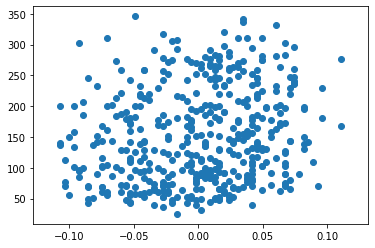

In [28]:
x=[i[0] for i in X]
plt.scatter(x,y)

당뇨병의 연령대 항목을 나타내는 그래프이다, 약간 우측으로 기울어진 경향이 있긴 하지만, 그래도 굉장히 골고루 퍼져있다는 것을 볼 수 있습니다.
젊은층이라고 당뇨가 안걸린다고 생각 마시고, 꾸준한 운동과 식단관리가 필요하다는 것은 저도 이번에, 데이터 조사하면서 처음 알게 되었습니다.

## ※ 참조 문헌

http://news.khan.co.kr/kh_news/khan_art_view.html?art_id=201708230900055

https://www.scitechnol.com/peer-review/diabetes-and-obesity-determinants-based-on-blood-serum-CRno.php?article_id=6015

https://pubmed.ncbi.nlm.nih.gov/11206408/